<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Machine Learning</h1>
    <h2 class="display-4">Introduction: Part I</h1>
  </div>
</div>

## Outline
- What tasks can ML systems/models learn to perform?
- How do we determine model performance?
- How do ML systems experience the data they learn from?
- What are the limitations on learning?

## What is machine learning?

## What is a machine?

<img src='./img/danger.png'>

## What is learning?
<div class="alert alert-block alert-info">
    <b>Improving <i>performance</i> (P) on some class of <i>tasks</i> (T) given <i>experience</i> (E).</b>
</div>

<img src='./img/learning-1.svg' style='width: 50%;'/>

You can mostly stick to this figure for now, and most ML models are simple enough or have well-defined inputs and outputs, and the "model" can be treated as a mathematical function or set of functions.
However, the state of the art in ML is largely about learning to learn (or meta-learning).

## The task, $T$
<div class="alert alert-block alert-warning">
    <b>What is the system learning to do?</b> 
</div>

- Walking
- Holding a cup
- Avoiding an obstacle

## The task, $T$

ML systems processing *examples* composed of _features_
  - Typically vectors $\mathbf{x}\in\mathbb{R}^n$ with $n$ features
<div class="alert alert-block alert-warning">
\begin{equation*}
f:\mathbb{R}^n\rightarrow ?
\end{equation*}
</div>
<img src='./img/learning-1.svg' style='width: 50%;'/>

### Classification
<div class="alert alert-block alert-info">
    <b>Which of $k$ categories does an input belong to?</b>
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\{1,\dots,k\}
\end{equation*}
</div>

- May also output distribution over classes
- Missing values (learn *set* of functions)
- Anomaly detection (e.g. spam, credit card fraud)

Example: 2D input space and segmentation.    
MNIST is 784D input space.    
Manifolds: change in small number of pixels leaves number relatively intact    

<img src='./img/MNIST.jpg'>
(Liu <i>et al.</i>, 2003)

<img src='./img/MNIST.gif'>
(see <a href='https://inclass.kaggle.com/arunkumarramanan/awesome-ml-frameworks-and-mnist-classification'>this post</a>)

What it *doesn't* do: understand numbers or math. Only shapes. This is all we require it to learn.

<img src='./img/classification.png'>
(Goodfellow <i>et al.</i>)

### Classification in neuroscience
- Neuron type from electrophysiology data
- Disease state from neuroimaging data (e.g. tumour in structural MRI)
- Arbitrary classes (e.g. "currently reaching" vs. "resting") from brain measurements (correlational!)

<img src='./img/gcn.png'>
(Arslan <i>et al.</i>, 2018)

### Regression
<div class="alert alert-block alert-info">
    <b>What value (of some quantity) is associated with a given input?</b>
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\mathbb{R}
\end{equation*}
</div>

- Firing rate, survival time, gene expression...

### Structured output
- Output is a vector or some other structure with relationships between members.
  <br>$\rightarrow$ Technically subsumes all other mapping tasks.

- Examples:
  - Partition of input (e.g. image segmentation)
  - Image captioning
  - Parsing sentences

<img src='./img/parsing.png'>
(Jurafsky & Martin, 2017)

### Segmentation, annotation

<img src='./img/deeplabcut.gif'>
(Mathis <i>et al.</i>, 2018)

<img src='./img/astrocytes.webp'>
(Suleymanova *et al.*, 2018)

### Transcription, translation

<img src='./img/translation.png'>
(Cho, 2015)

### Synthesis and sampling
- Generate examples *similar* to training data.
- Implicit distribution (no single "correct" output)

<video src="./img/gan_faces.mp4" type="video/mp4" controls>Uh oh.</video><br>
(Karras <i>et al.</i>, 2018)

<video src="./img/ramen.mp4" type="video/mp4" controls>Uh oh.</video><br>
(<a href='https://www.youtube.com/watch?v=Rnj2RLycHA4'>Kenji Doi</a>)

### Missing value imputation
- $\mathbf{x}\in\mathbb{R}^n$ with some $x_i$ missing
- Compare to sampling (partial).

### Denoising
- Predict clean example $\mathbf{x}\in\mathbb{R}^n$ given a corrupted example $\tilde{\mathbf{x}}\in\mathbb{R}^n$.
- Unknown corruption process; i.e. learn $p(\mathbf{x}|\tilde{\mathbf{x}})$

<img src='./img/denoising.png'>
(Lehtinen <i>et al.</i>, 2018)

### Probability mass/density estimation
- Implicitly subsumes other tasks
- Learn $p(\mathbf{x})$ $\rightarrow$ other tasks <!-- (e.g. missing value imputation). -->
  - e.g. generative model with p(A)=0.5

<img src='./img/simplex.svg' style='width: 25%;'/>
(Cho, 2015)

## The performance measure, $P$
<div class="alert alert-block alert-warning">
    <b>How do we quantify how well the system is performing the task?</b>
</div>


- Quantitative
- Task-specific
- Choice not obvious <!-- penalize frequent small mistakes or infrequent large mistakes? Global vs. local errors? -->
- e.g. classification: accuracy and error rate (expected 0-1 loss)

## The experience, $E$
<div class="alert alert-block alert-warning">
    <b>What learning method is used?</b>
</div>

- <b>Datasets</b>: collections of many examples/data points
- <b>Design matrix</b>
  - e.g. $\mathit{\mathbf{X}}\in\mathbb{R}^{150\times4}$ for 150 examples, 4 features.
  - Not always possible; heterogeneous examples described as sets: $$\{\mathbf{x}^{(1)},\mathbf{x}^{(2)},\dots,\mathbf{x}^{(m)}\}$$

### Unsupervised learning
- Experience a dataset with many features and learn useful structural properties
- Typically want to learn the entire probability distribution that generated the dataset (explicitly or not)
- Learn $p(\mathbf{x})$ from $\mathbf{x}$ examples.

### Unsupervised learning: Clustering
<img src='./img/clustering.svg' style='width: 50%;'/>
(Image <a href='https://developers.google.com/machine-learning/clustering/clustering-algorithms'>reproduced from work</a> created and shared by Google and used according to terms described in the Creative Commons 4.0 Attribution License.)

### Supervised learning
- Each example experienced is associated with a label or target.
  - Labels may be simple numbers (e.g. class numbers) or more complex (e.g. correctly transcribed sentence).
- Learn $p(\mathbf{y}|\mathbf{x})$ from $(\mathbf{x},\mathbf{y})$ examples.

<img src='./img/supervised.svg' style='width: 50%;'/>

### Supervised vs. unsupervised
- Chain rule: decompose unsupervised problem into $n$ supervised problems: 
$$p(\mathbf{x})=\prod_{i=1}^{n}p(\mathrm{x}_i|\mathrm{x}_1,\dots,\mathrm{x}_{i-1})$$
- Conditional probability: solve supervised problem by learning joint distribution
$$p(y|\mathbf{x})=\frac{p(\mathbf{x},y)}{\sum_{y^\prime}p(\mathbf{x},y^\prime)}$$

<div class="alert alert-block alert-warning">
    Traditionally, regression, classification, and structured output are considered supervised; density estimation is considered unsupervised.
</div>

### Other paradigms
- <b>Semi-supervised</b>: only some example labelled)
- <b>Multi-instance</b>: collections of examples labelled
- <b>Reinforcement learning</b>: feedback between learning system and experiences

<img src='./img/learning-1.svg' style='width: 50%;'/>

<img src='./img/learning-2.svg' style='width: 50%;'/>

A useful metaphor, if you don't have a strong intuition for what "model" means. 

<img src='./img/learning-3b.svg' style='width: 50%;'/>

<img src='./img/learning-3.svg' style='width: 50%;'/>

- Simplification: brain has highly entangled/hierarchical predictions and decisions
- What is "everything else"? e.g. brain implicitly learns nerve delays

<div class="alert alert-block alert-warning">
    <b>"the process of learning itself is not the task"</b>
</div>

<img src='./img/learning-1.svg' style='width: 50%;'/>

<img src='./img/learning-4.svg' style='width: 50%;'/>

<img src='./img/learning-6.svg' style='width: 50%;'/>

A useful metaphor, if you don't have a strong intuition for what "model" means. 

## What is learning?


### Evolution
  - Chemical thermodynamics, metastability
  - Chemical to cellular to multicellular to nervous
  <img src='./img/chem_evolution.jpg'>
  (Kitadai & Maruyama, 2018)

### Correlational learning
  - System does not reflect on causality.
  - Often stereotyped/predictable responses.
  - Circadian entrainment
  - Single neuron? PFC damage example?

### Correlation learning
#### Kalman filter
<img src='./img/KalmanFilter.png'>
([Modelica Buildings Library](https://simulationresearch.lbl.gov/modelica/))

### Causal learning
  - Structure and abstractions
  - Planning and design
  <img src='./img/causal.jpg' style='width: 50%;'/>
  (Braun <i>et al.</i>, 2009)

Simpler models tend to have built-in assumptions about structure. 
More complex models of causality + bounded rationality tend to involve reinforcement learning, thinking about thinking (e.g. how much effort should I allocate to learning about subset X of the data?), and learning itself becomes part of the task.

## Generalization
<div class="alert alert-block alert-info">
    <b>How does a model perform on previously unseen inputs?</b>
</div>

- Training vs. generalization error.
- Can only observe training set.
- Shared data generating process (i.i.d.).

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def quadratic(x, loc=0., scale=1.):
    return scale * (x - loc)**2

In [27]:
from functools import partial

# a little trick to fix the parameters of this function
gen_func = partial(quadratic, loc=0.5, scale=-1.)

In [28]:
def get_dataset(N, gen_func, noise_scale, domain=(0.0, 1.0)):
    # uniformly sample across example domain
    x = np.random.uniform(*domain, size=N)

    # take value of generating function at sampled locations
    # & corrupt with Gaussian noise
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=N)
    y = gen_func(x) + noise
    
    return x, y

In [29]:
N, N_test = 20, 10  # number of examples
noise_scale = 0.025  # SD of Gaussian noise added to generating distribution

x, y = get_dataset(N, gen_func, noise_scale)
x_test, y_test = get_dataset(N_test, gen_func, noise_scale)

In [30]:
# sample the (uncorrupted) generating function on a regular grid, for plotting
x_grid = np.linspace(0, 1, 100)
y_true = gen_func(x_grid)

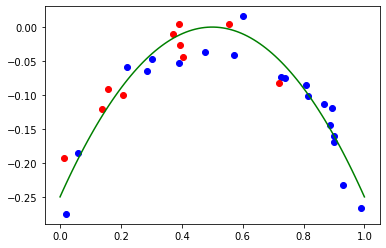

In [31]:
plt.plot(x, y, 'bo')
plt.plot(x_test, y_test, 'ro')
plt.plot(x_grid, y_true, 'g-')
xlim = plt.xlim()  # keep limits for plots to follow
ylim = plt.ylim()
plt.show()

### Capacity
<div class="alert alert-block alert-info">
    <b>Ability of a model to fit a wide variety of functions.</b>
</div>

- *Hypothesis space* of functions
- Representational capacity (upper bound) vs. effective capacity
- Too high: overfitting. Too low: underfitting.
- Statistical learning theory: Gap between training and generalization error is bounded above by a quantity that grows with capacity, but shrinks with number of training examples.
  - Simpler functions more likely to generalize, but must still choose a sufficiently complex hypothesis to achieve low training error.
- Best performance: Matched to complexity of the task and the number of available examples.

Examples:
- Polynomial degree
- Gaussian process kernels

### Underfitting and overfitting
1. Make the training error small
2. Make the gap between training and generalization error small.

<img src='./img/generalization.png'>
(Goodfellow <i>et al.</i>)

In [38]:
from sklearn import linear_model

In [39]:
# add polynomial features to design matrix
def add_poly_terms(x, order=2):
    X = np.zeros((x.shape[0], order))
    X[:, 0] = np.copy(x)
    for col in range(1, order):
        X[:, col] = x ** (col + 1)
    return X

In [90]:
order = 1
X = add_poly_terms(x, order)

reg = linear_model.LinearRegression().fit(X, y)
score = reg.score(X, y)
y_reg = reg.predict(add_poly_terms(x_grid, order))

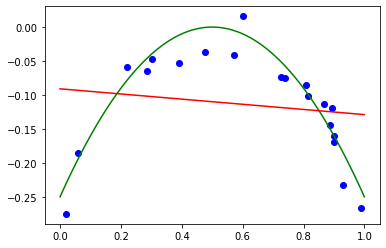

In [91]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, y_true, 'g-')
plt.plot(x_grid, y_reg, 'r-')
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [92]:
def mse(y, y_ref):
    return np.mean((y - y_ref)**2)

train_err = mse(reg.predict(add_poly_terms(x, order)), y)
gen_err = mse(y_reg, y_true)
print("Training error: {:.4}".format(train_err))
print("Generalization error: {:.4}".format(gen_err))

Training error: 0.005911
Generalization error: 0.006521


### Number of parameters
$$f_\theta(x)=\sin^2\left(2^{rx}\arcsin\sqrt{\theta}\right)$$
<img src='./img/single-param.png'>
(Piantadosi, 2018)

### Ideal performance
- Ideal model: Oracle that knows the true distribution.
  - Errors are still possible!

- *Bayes error*: error incurred by an oracle (lower bound). <!-- e.g. overlapping true distributions -->

### Non-parametric models
- Limit of infinite capacity; no parametrized function fixed prior to learning.
- Example: 
  - Wrap parametric learning algorithm inside another algorithm that optimizes no. of parameters as needed.
  - Nearest neighbour regression.

<img src='./img/1nn.png'>
(User:<a href="https://commons.wikimedia.org/wiki/File:Map1NN.png">Agor153</a> @ Wikipedia)

### No Free Lunch theorem
<div class="alert alert-block alert-warning">
    <b>"averaged over all possible data generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points"</b>
</div>


$\rightarrow$ need to make assumptions about relevance of data generating distributions!

### Regularization
<div class="alert alert-block alert-info">
    <b>Any modification to learning algorithm intended to <i>reduce generalization error</i> but not training error.</b>
</div>

- Additional constraints following choice of hypothesis space.

#### Weight decay

$$J(\mathbf{w})=\mathrm{MSE_{train}}+\lambda\mathbf{w}^\top\mathbf{w}$$

- Multi-collinearity

In [97]:
order = 2
alpha = 0.01
X = add_poly_terms(x, order)

reg = linear_model.LinearRegression().fit(X, y)
y_reg = reg.predict(add_poly_terms(x_grid, order))
reg_ridge = linear_model.Ridge(alpha=alpha).fit(X, y)
y_ridge = reg_ridge.predict(add_poly_terms(x_grid, order))

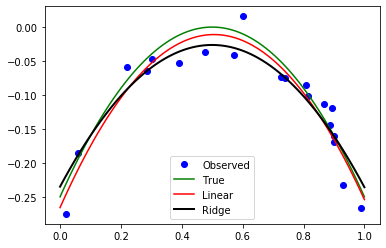

In [98]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, y_true, 'g-')
plt.plot(x_grid, y_reg, 'r-')
plt.plot(x_grid, y_ridge, 'k-', lw=2)
plt.legend(['Observed','True','Linear','Ridge'])
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

### Hyperparameters
- Learning algorithm parameters
  <br>$\rightarrow$ not adapted by learning algorithm itself
- Can't optimize on training set (always higher capacity)
  - Need *validation set* (**not** test set)
  - Traditionally: Split training set into 80%/20% training/validation
- Example: 
  - Polynomial order; 
  - Weight decay parameter

### Cross-validation
1. Split dataset into $k$ non-overlapping subsets
2. $k$ trials; on trial $i$, use $i$-th subset as validation set and remainder as training set. 
3. Average trial errors to estimate overall error.

<img src='./img/crossval.png'>
(Ashfaque & Iqbal, 2019)

### Point estimators
i.e. "statistics"
<div class="alert alert-block alert-warning">
    <b>What is the best prediction for a quantity?</b>
</div>

- Any function of i.i.d. data points $\{\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\}$: $$\hat{\mathbf{\theta}}_m=g\left(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\right)$$
- Good estimator: $\hat{\mathbf{\theta}}$ close to underlying $\mathbf{\theta}$
- Frequentism: true $\mathbf{\theta}$ fixed but unknown, and $\hat{\mathbf{\theta}}$ is function of the data; as the data is drawn from a random process, $\hat{\mathbf{\theta}}$ is a random variable.
- Example:
  - Weights in linear regression.
  - Functions ($\hat{f}$)

#### Bias
$$\mathrm{bias}\left(\hat{\mathbf{\theta}}_m\right)=\mathbb{E}\left(\hat{\mathbf{\theta}}_m\right)-\mathbf{\theta}$$
- Expectation over the data.
- <b>Unbiased</b> estimator: $\mathrm{bias}=0$, i.e. $\mathbb{E}(\hat{\mathbf{\theta}}_m)=\mathbf{\theta}$
  - <i>Asymptotically</i> unbiased if $\lim_{m\rightarrow\infty}\mathrm{bias}(\hat{\mathbf{\theta}}_m)$

#### Variance
$$\mathrm{Var}(\hat\theta)$$
- Square root of variance: standard error, $\mathrm{SE}(\hat{\theta})$
- Expected variation in estimate as we independently resample the dataset.


#### Bias-variance tradeoff
\begin{align*}
\mathrm{MSE}&=\mathbb{E}\left[(\hat{\theta}_m-\theta)^2\right] \\
            &=\mathrm{Bias}(\hat{\theta}_m)^2+\mathrm{Var}(\hat{\theta}_m)
\end{align*}
- Typically use cross-validation
- May also compare MSE directly
  - MSE: Overall expected deviation
  - Small MSE: estimator keeping both bias and variance somewhat in check

<img src='./img/tradeoff.png'>

## ML vs statistics
- Procedures/"statistics" vs. optimization
  - Deciding on specific computations vs. principles

- Simpler vs. more complex ML models
  - Linear regression: deterministic optimization
  - Deep learning: don't assume a representation

## Disentangling
- Factors of variation
- Separability vs. representation
- More complex example: object identity from perspective, location

<img src='./img/pca_vs_vae-1.png'>
(Hinton & Salakhutdinov, 2006)

<img src='./img/pca_vs_vae-2.png'>
(Hinton & Salakhutdinov, 2006)

<div class="alert alert-block alert-warning">
    <b>What work are we doing for our models?</b>
</div>
<img src='./img/representations.png'>
(Goodfellow <i>et al.</i>)

## Deep learning and neuroscience
<img src='./img/deep_neuro.jpg'>
(Yamins & DiCarlo, 2016)

## Summary
- Be careful what assumptions you make, and what work you're doing for your models:
  - Appropriate use of test set blinding
  - "Overfitting by grad student" & model decisions, inputs
  - "Why is my model not like a brain?"

- Use <b>cross-validation</b> to optimize hyperparameters and improve generalization

- Hold a test set aside, and only calculate test error at the <i>end</i> of study.

- Think about how more complex models are <i>composed</i> from simpler models/principles.

- Think about how different sources of variation/causality are entangled in data.